## Stroke prediction

## I - importing libraries and dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing dataset

In [ ]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## II - analyse desrcriptive des données

### II-A Statistiques 

In [ ]:
dataset.shape

(5110, 12)

In [ ]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset_copy=dataset.copy(deep=True)

In [ ]:
#encodage des variables catégorielles
=pd.get_dummies(dataset_copy,drop_first=True)

In [ ]:
dataset_copy

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


### II-B Visalisation des données

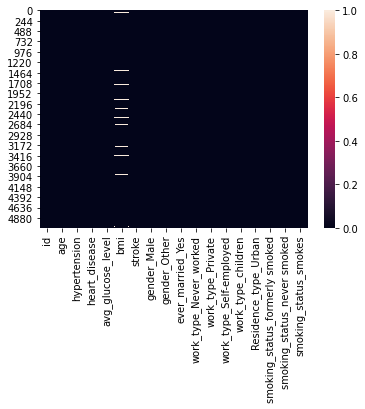

In [ ]:
# Visualisation des valeurs manquantes
import seaborn as sns
sns.heatmap(dataset_copy.isna())

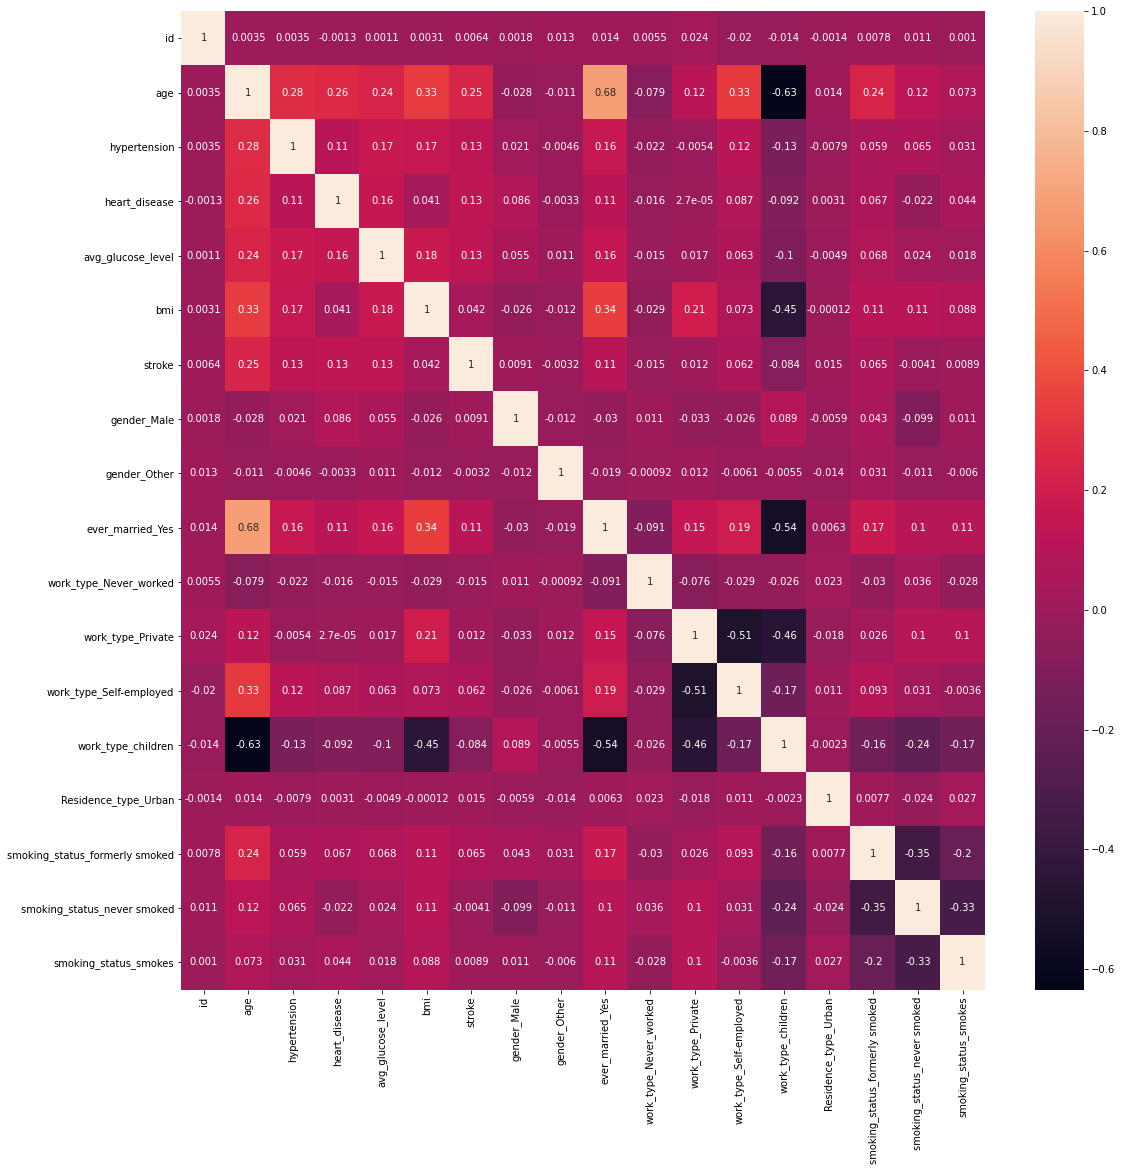

In [ ]:
# matrice de corrélation
plt.figure(figsize=(18,18))
sns.heatmap(dataset_copy.corr(),annot=True)

### Représentation de la Variable dépendante stroke

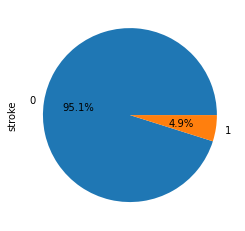

In [ ]:
dataset['stroke'].value_counts().plot.pie(autopct="%.1f%%")

##### NB: Répartition déséquilibré de la target 
---



#### Représentation des variables qualitatives indépendantes

In [ ]:
dataset['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
dataset['gender'] = dataset['gender'].replace("Other", "Female")

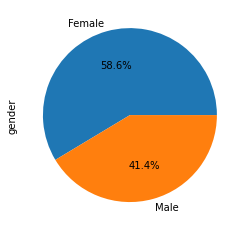

In [ ]:
dataset['gender'].value_counts().plot.pie(autopct="%.1f%%")

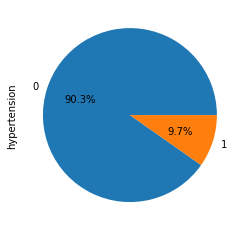

In [ ]:
dataset['hypertension'].value_counts().plot.pie(autopct="%.1f%%")

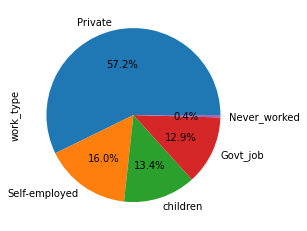

In [ ]:
dataset['work_type'].value_counts().plot.pie(autopct="%.1f%%")

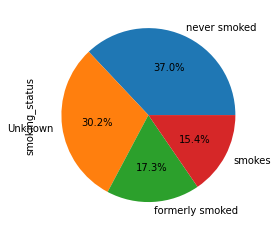

In [ ]:
dataset['smoking_status'].value_counts().plot.pie(autopct="%.1f%%")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


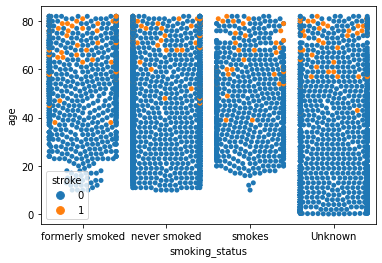

In [ ]:
sns.swarmplot(x= 'smoking_status', y = 'age', data = dataset, hue ='stroke')

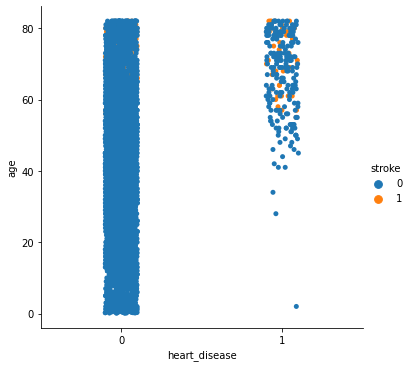

In [ ]:
sns.catplot(x= 'heart_disease', y = 'age', data = dataset, hue ='stroke')

#### Représentation des variables qantitatives

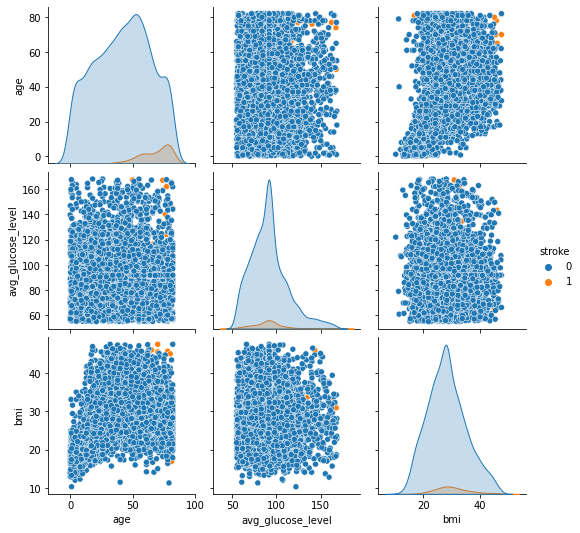

In [ ]:
sns.pairplot(dataset[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue = 'stroke')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


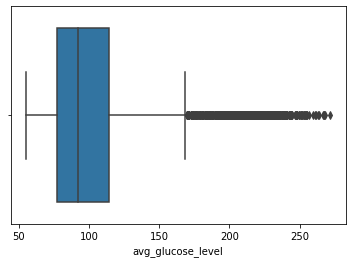

In [ ]:
sns.boxplot( dataset["avg_glucose_level"])

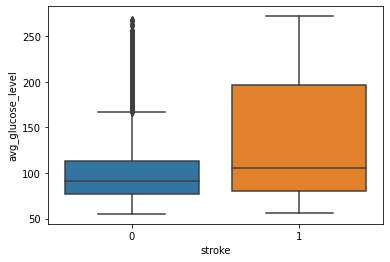

In [ ]:
sns.boxplot(x = "stroke", y = "avg_glucose_level", data = dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


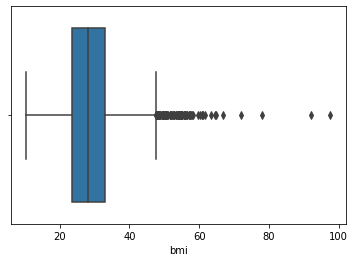

In [ ]:
sns.boxplot( dataset["bmi"])

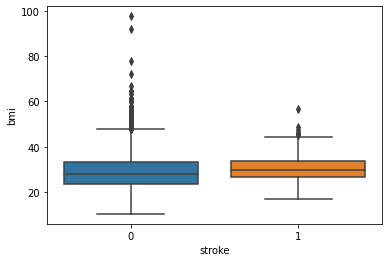

In [ ]:
sns.boxplot(x = "stroke", y = "bmi", data = dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


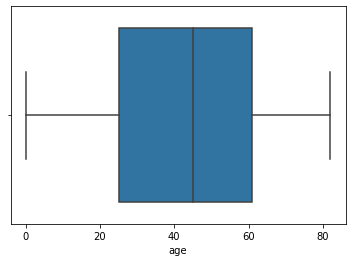

In [ ]:
sns.boxplot( dataset["age"])

Les variables : bmi et avg_glucose_level contiennent des outliers

## III - Preprocessing

#### III -A  Gestion des outliers



In [ ]:
  #function to find outliers
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail :
            out.append(i)
    return out

In [ ]:
d =iqr_outliers(dataset ['bmi'])
d.sort()
d[0]


47.6

In [ ]:
e=iqr_outliers(dataset['avg_glucose_level'])
e.sort()
e[0]

169.43

In [ ]:
#median imputation in bmi
med=dataset.bmi.median()
for i in dataset.bmi:
    if i>=47.6:
        dataset.bmi=dataset.bmi.replace(i,med)

In [ ]:
#median imputation in avg_glucose_level
med=dataset.avg_glucose_level.median()
for i in dataset.avg_glucose_level:
    if i>=168.68:
        dataset.avg_glucose_level=dataset.avg_glucose_level.replace(i,med)

In [ ]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,91.475254,28.308800,0.048728
std,21161.721625,22.612647,0.296607,0.226063,21.173928,6.764226,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.882500,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,101.275000,32.500000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,168.150000,47.500000,1.000000


### III -B  Encoding

In [ ]:
##Encodage manuel des variables catégorielles yes or no
dataset['ever_married']=dataset['ever_married'].replace({'Yes':1,'No':0})

In [ ]:
dataset.drop(['id'], axis= 1, inplace=True)

In [ ]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,91.885,36.6,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,91.885,NaN,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.920,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,91.885,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,91.885,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,Urban,83.750,NaN,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,Urban,125.200,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,Rural,82.990,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,Rural,166.290,25.6,formerly smoked,0


In [ ]:
# Splitting dependent Variable et target
X= dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([['Male', 67.0, 0, ..., 91.88499999999999, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 91.88499999999999, nan, 'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,5,6,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[0.0, 1.0, 0.0, ..., 1, 91.88499999999999, 36.6],
       [1.0, 0.0, 0.0, ..., 1, 91.88499999999999, nan],
       [0.0, 1.0, 0.0, ..., 1, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 1, 166.29, 25.6],
       [1.0, 0.0, 1.0, ..., 1, 85.28, 26.2]], dtype=object)

### III-C  Gestion des NA

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X = imputer.fit_transform(X)

In [ ]:
X

array([[  0.   ,   1.   ,   0.   , ...,   1.   ,  91.885,  36.6  ],
       [  1.   ,   0.   ,   0.   , ...,   1.   ,  91.885,  39.2  ],
       [  0.   ,   1.   ,   0.   , ...,   1.   , 105.92 ,  32.5  ],
       ...,
       [  1.   ,   0.   ,   0.   , ...,   1.   ,  82.99 ,  30.6  ],
       [  0.   ,   1.   ,   0.   , ...,   1.   , 166.29 ,  25.6  ],
       [  1.   ,   0.   ,   1.   , ...,   1.   ,  85.28 ,  26.2  ]])

### III -D  **Imbalanced** dataset to **balanced** dataset

In [ ]:
# Rééchantillonage
from imblearn.over_sampling import SMOTE

smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X, y)

# Autre option Sur-échantillonnage
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#rOs = RandomOverSampler()
#X_ro, y_ro = rOs.fit_resample(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### III -E  Splitting Imbalanced dataset to trainset and testset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size = 0.25, random_state = 0)

### III-F   Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.92627609, -0.92627609,  2.85507994, ...,  0.5710442 ,
         0.71384767,  1.27862352],
       [ 0.92627609, -0.92627609,  2.58526919, ..., -1.71987919,
         0.32072936, -1.12008162],
       [ 0.92627609, -0.92627609, -0.41824443, ...,  0.5710442 ,
         0.02549202,  1.81899946],
       ...,
       [ 0.92627609, -0.92627609, -0.41824443, ..., -0.9079073 ,
        -1.20515325,  0.43047538],
       [ 0.92627609, -0.92627609, -0.41824443, ..., -0.27871636,
        -0.47767047, -1.66219749],
       [-1.2494736 ,  1.2494736 , -0.41824443, ...,  0.5710442 ,
        -1.27313788, -1.25743353]])

## IV- Training the catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.024063
0:	learn: 0.6605786	total: 59.5ms	remaining: 59.4s
1:	learn: 0.6370414	total: 68.5ms	remaining: 34.2s
2:	learn: 0.6057967	total: 77.6ms	remaining: 25.8s
3:	learn: 0.5829052	total: 87.3ms	remaining: 21.7s
4:	learn: 0.5624174	total: 95.7ms	remaining: 19s
5:	learn: 0.5451271	total: 105ms	remaining: 17.4s
6:	learn: 0.5274876	total: 114ms	remaining: 16.2s
7:	learn: 0.5055703	total: 122ms	remaining: 15.2s
8:	learn: 0.4860714	total: 131ms	remaining: 14.4s
9:	learn: 0.4713584	total: 139ms	remaining: 13.8s
10:	learn: 0.4533777	total: 148ms	remaining: 13.3s
11:	learn: 0.4363379	total: 157ms	remaining: 12.9s
12:	learn: 0.4190584	total: 165ms	remaining: 12.6s
13:	learn: 0.4109018	total: 174ms	remaining: 12.3s
14:	learn: 0.3988907	total: 183ms	remaining: 12s
15:	learn: 0.3891191	total: 192ms	remaining: 11.8s
16:	learn: 0.3756735	total: 206ms	remaining: 11.9s
17:	learn: 0.3631776	total: 215ms	remaining: 11.8s
18:	learn: 0.3571396	total: 224ms	remaining: 11.6s
19:	learn:

## V- Evaluating the model

#### V-A Making the confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1207    9]
 [  61 1154]]


0.9712052653229124

In [ ]:
from imblearn.metrics import  classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.99      0.95      0.97      0.97      0.95      1216
          1       0.99      0.95      0.99      0.97      0.97      0.94      1215

avg / total       0.97      0.97      0.97      0.97      0.97      0.94      2431



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


#### V-B Applyig k-fold

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.5901462	total: 73.6ms	remaining: 10.4s
7:	learn: 0.5765676	total: 80.1ms	remaining: 9.93s
8:	learn: 0.5623433	total: 86.8ms	remaining: 9.56s
9:	learn: 0.5520329	total: 94ms	remaining: 9.31s
10:	learn: 0.5432499	total: 101ms	remaining: 9.04s
11:	learn: 0.5344659	total: 107ms	remaining: 8.82s
12:	learn: 0.5227320	total: 114ms	remaining: 8.68s
13:	learn: 0.5123624	total: 121ms	remaining: 8.53s
14:	learn: 0.5025998	total: 128ms	remaining: 8.38s
15:	learn: 0.4964785	total: 134ms	remaining: 8.23s
16:	learn: 0.4867068	total: 140ms	remaining: 8.11s
17:	learn: 0.4783309	total: 147ms	remaining: 7.99s
18:	learn: 0.4711918	total: 153ms	remaining: 7.9s
19:	learn: 0.4625013	total: 160ms	remaining: 7.82s
20:	learn: 0.4547105	total: 166ms	remaining: 7.74s
21:	learn: 0.4484702	total: 173ms	remaining: 7.68s
22:	learn: 0.4418286	total: 179ms	remaining: 7.6s
23:	learn: 0.4341695	total: 185ms	remaining: 7.53s
24:	learn: 0.4287745	total: 191ms	r